In [1]:
# cleaning data from file

In [2]:
import pandas as pd
import missingno as mano

In [3]:
df = pd.read_csv("googleplaystore.csv")

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<Axes: >

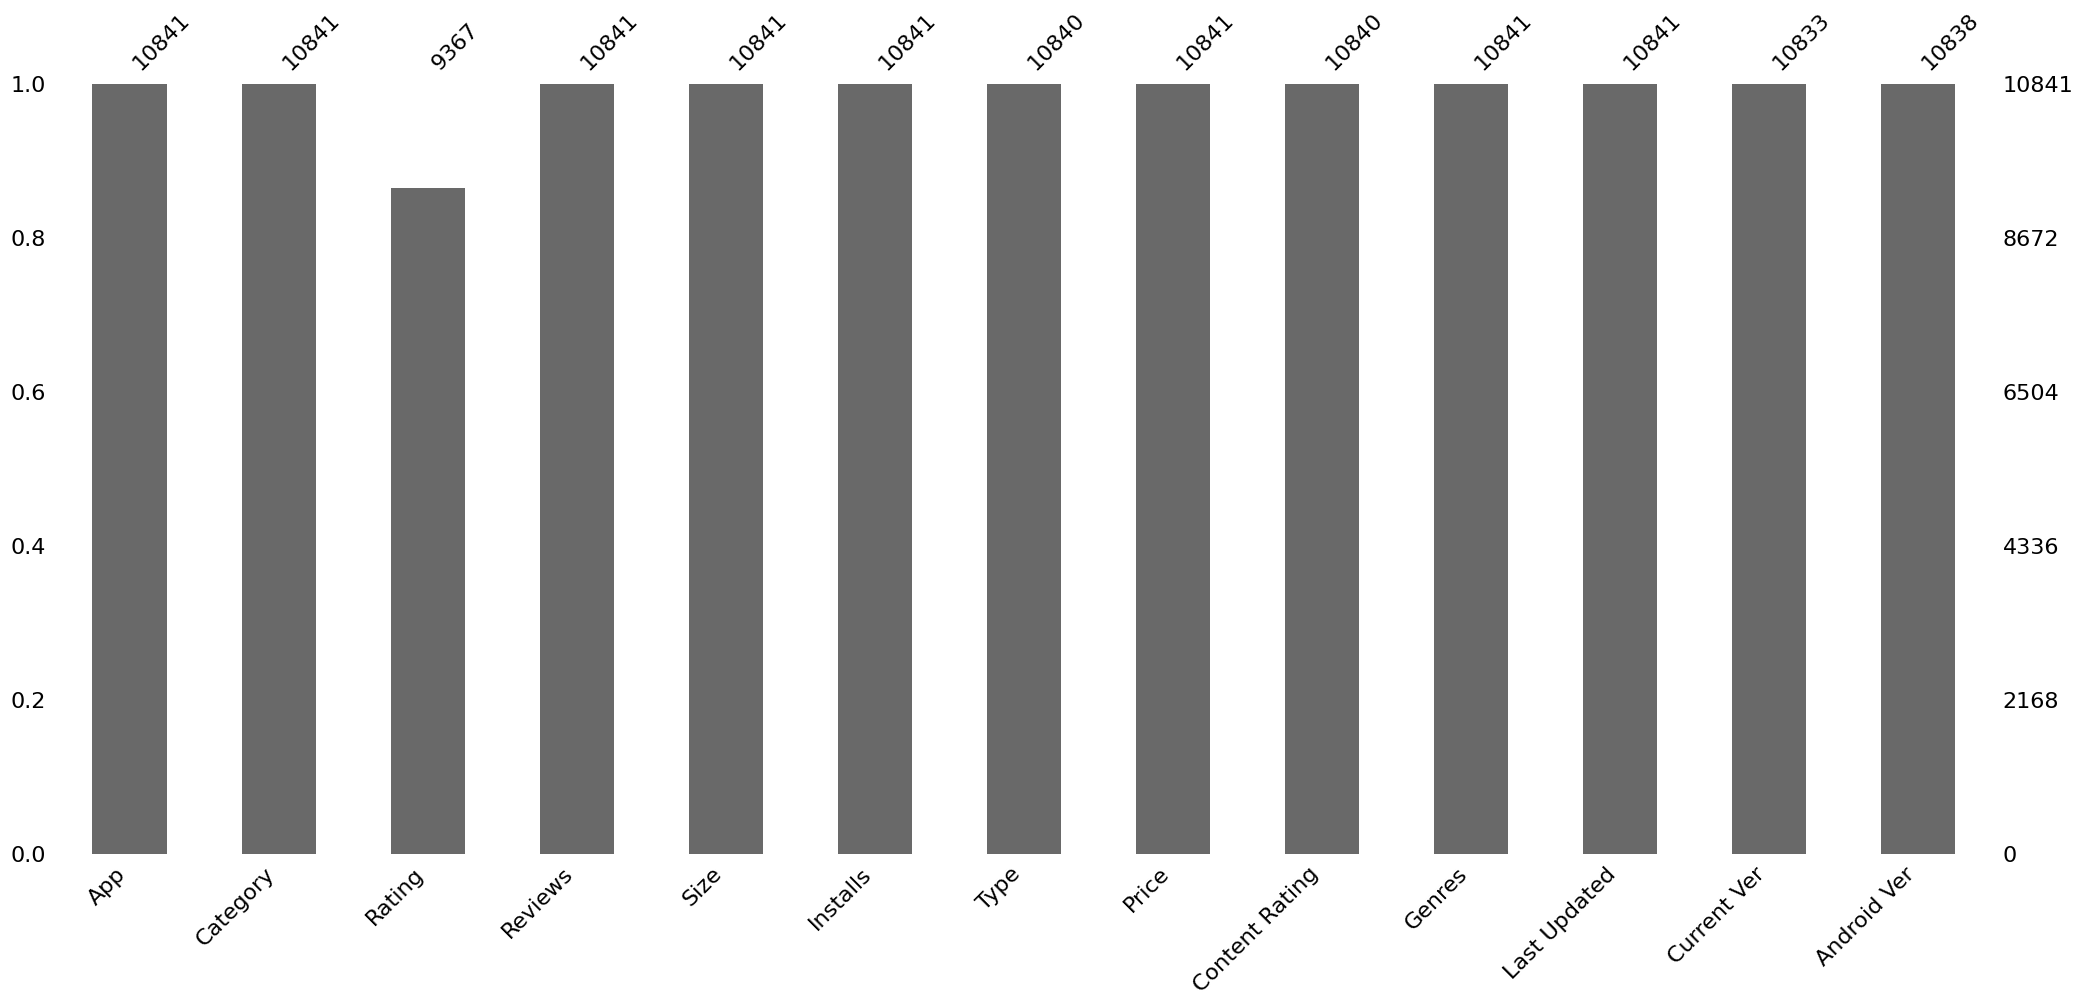

In [6]:
mano.bar(df)
# many cols has values < 10841

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [8]:
NullValuesRemoved = df.loc[~df['Rating'].isna()]
df = NullValuesRemoved
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [9]:
# how many duplicate apps are there

# df.loc[df.duplicated(subset=['App'],keep=False)].sort_values(by='App').head(15)
df.duplicated(keep=False).sum()

876

In [10]:
# drop dup apps keeping the ones with greatest number of reviews
# df.duplicated(subset=['App'], keep=False): 
# This part of the query identifies rows in the 
# DataFrame df where the 'App' column has duplicate values. 
# df.duplicated(subset=['App'], keep=False) returns a 
# boolean Series with True for all rows with duplicate 
# 'App' values and False for non-duplicate 'App' values.

# ~df.duplicated(keep=False): Here, we are using the 
# ~ operator to negate the boolean Series generated 
# in the previous step. This means we are selecting 
# rows that are not marked as duplicates when considering 
# all columns. So, this part identifies the unique rows in the DataFrame.

# df.loc[...]: This part is using boolean indexing with the .
# loc function to filter the rows based on the conditions 
# provided in the subsequent steps.

df.loc[df.duplicated(subset=['App'],keep=False)&
       ~df.duplicated(keep=False)].sort_values(by=['App','Reviews']).head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
559,95Live -SG#1 Live Streaming App,DATING,4.1,4953,15M,"1,000,000+",Free,0,Teen,Dating,1-Aug-18,8.7.2,4.2 and up


In [11]:
# format category column

df['Category'].value_counts()
df['Category'] = df['Category'].str.replace('_',' ')


In [12]:
df['Category'] = df['Category'].str.capitalize()

In [13]:
## clean & convert col install to numeric

df.loc[pd.to_numeric(df['Installs'],errors='coerce').isna()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,Art and design,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art and design,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art and design,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art and design,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [36]:
# name of most expensive 

df.sort_values(by='Price',ascending=False)
# df.loc[df['Category']=='Game'].sort_values(by='Price',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,Free
6674,Baskin-Robbins,Food and drink,3.8,1103,6.6M,"100,000+",Free,0,Everyone,Food & Drink,8-Jun-18,1.4.0-2,4.1 and up,Free
6661,IKEA Store,Shopping,3.4,25515,Varies with device,"10,000,000+",Free,0,Everyone,Shopping,16-Jul-18,Varies with device,Varies with device,Free
6662,Simple Gallery,Tools,4.5,28030,9.0M,"1,000,000+",Free,0,Everyone,Tools,2-Aug-18,4.4.4,4.1 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,iBP Blood Pressure,Medical,4.4,578,704k,"10,000+",Paid,$0.99,Everyone,Medical,30-Nov-14,7.0.1,2.2 and up,Free
7665,"Chinese Chess 3D Online (Xiangqi, 象棋, co tuong)",Game,3.5,23,37M,"1,000+",Paid,$0.99,Everyone,Board,27-Dec-17,2.2.1,4.1 and up,Free
9876,EU Flags Live Wallpaper,Personalization,4.3,444,12M,"10,000+",Paid,$0.99,Everyone,Personalization,18-Nov-13,1.95,2.1 and up,Free
6088,Wolf of the BF:Commando MOBILE,Game,3.4,32,27M,"1,000+",Paid,$0.99,Everyone 10+,Arcade,23-Mar-17,1.00.10,4.0 and up,Free


In [37]:
# most popular finance apps

df.loc[df['Category']=='Finance'].sort_values(by=['Rating','Installs'],ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
6398,BK Gold App,Finance,5.0,4,11M,50+,Free,0,Everyone,Finance,25-May-18,1.0.0,4.4 and up,Free
6953,BxPort - Bitcoin Bx (Thailand),Finance,5.0,4,4.1M,50+,Free,0,Everyone,Finance,14-Jul-18,1.0.4,4.2 and up,Free
7896,CT Checkout,Finance,5.0,1,8.4M,50+,Free,0,Everyone,Finance,20-Apr-17,1.2,4.2 and up,Free
6275,BI APP,Finance,5.0,2,2.7M,100+,Free,0,Everyone,Finance,19-Feb-16,1.8,4.0 and up,Free
7258,CF,Finance,5.0,2,2.0M,100+,Free,0,Everyone,Finance,30-Mar-16,1.1,4.0 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,Bitcoin BX Thailand PRO,Finance,1.7,21,21M,100+,Paid,$4.99,Everyone,Finance,22-Oct-17,5,4.0.3 and up,Free
7126,CB Mobile Access,Finance,1.5,57,25M,"1,000+",Free,0,Everyone,Finance,26-Feb-18,4.3.6,4.2 and up,Free
10082,EY TaxChat,Finance,1.2,44,27M,"1,000+",Free,0,Everyone,Finance,9-Apr-18,3.24.0,6.0 and up,Free
7144,CB Mobile Biz,Finance,1.0,3,8.4M,500+,Free,0,Everyone,Finance,22-Feb-16,4.4.1255,4.0 and up,Free
